In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import os
import math

from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

# Read file

In [2]:
RMS=pd.read_csv('RMS-all.csv')

In [3]:
RMS.head(3)

,Stru,zone,num,well,CPI,RST,CPI_RST
0,B,2,0,BA1,0.12,0.21,0.22
1,B,2,1,BA2,0.00,0.00,0.00
2,B,2,2,BA2ST,0.00,0.18,0.00


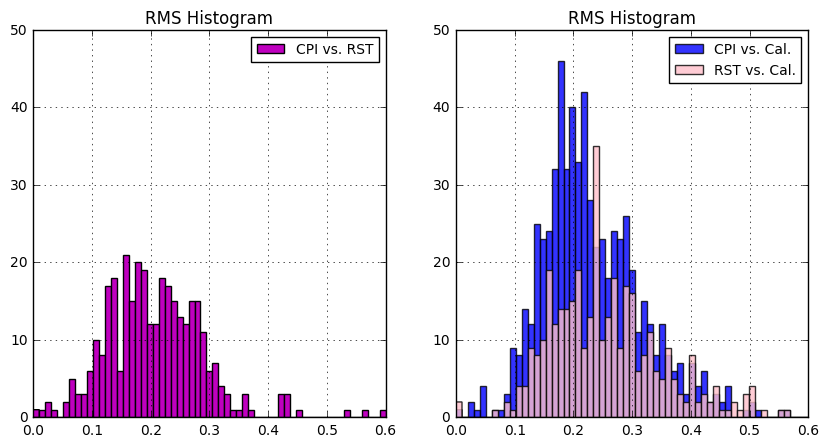

In [4]:
a=RMS[RMS.CPI>0]
b=RMS[RMS.RST>0]
c=RMS[(RMS.CPI_RST>0)]

plt.figure(figsize=(10,5))

binBoundaries = np.linspace(0,0.6,60)

plt.subplot(121)
c.CPI_RST.hist(bins=binBoundaries, color ='m', label='CPI vs. RST')
plt.legend(prop={'size': 10})
plt.ylim(0,50)
plt.ylim(0,50)
plt.title('RMS Histogram')

plt.subplot(122)
a.CPI.hist(bins=binBoundaries, color ='b', alpha=0.8, label='CPI vs. Cal.')
b.RST.hist(bins=binBoundaries, color ='pink', alpha=0.8, label='RST vs. Cal.')
plt.legend(prop={'size': 10})
plt.ylim(0,50)
plt.title('RMS Histogram')




#plt.savefig('RMS-ALL.png', bbox_inches='tight')    

In [5]:
np.median(a.CPI)
np.mean(a.CPI)

0.23286809815950923

In [6]:
np.median(b.RST)
np.mean(b.RST)

0.2558402203856747

In [7]:
np.median(c.CPI_RST)
np.mean(c.CPI_RST)

0.20895209580838325

In [8]:
def histCPI2_4(df):
    df2_4=pd.DataFrame({
            '2': df.CPI[df.zone=='2'],
            '3A': df.CPI[df.zone=='3A'],
            '3A2': df.CPI[df.zone=='3A2'],
            '3B': df.CPI[df.zone=='3B'],
            '3C': df.CPI[df.zone=='3C'],
            '4A': df.CPI[df.zone=='4A'],
            '4B': df.CPI[df.zone=='4B'],
            '4C': df.CPI[df.zone=='4C'],
        }, columns=['2', '3A', '3A2', '3B', '3C', '4A', '4B', '4C'])
    return df2_4

def histCPI5(df):
    df5=pd.DataFrame({
            '5A0': df.CPI[df.zone=='5A0'],
            '5A1': df.CPI[df.zone=='5A1'],
            '5A2': df.CPI[df.zone=='5A2'],
            '5A3': df.CPI[df.zone=='5A3'],
            '5B': df.CPI[df.zone=='5B'],
            '5C': df.CPI[df.zone=='5C'],
            '5E': df.CPI[df.zone=='5E'],
            '5F': df.CPI[df.zone=='5F'],
        }, columns=['5A0', '5A1', '5A2', '5A3', '5B', '5C', '5E', '5F'])
    return df5
    

def histRST2_4(df):
    df2_4=pd.DataFrame({
            '2': df.RST[df.zone=='2'],
            '3A': df.RST[df.zone=='3A'],
            '3A2': df.RST[df.zone=='3A2'],
            '3B': df.RST[df.zone=='3B'],
            '3C': df.RST[df.zone=='3C'],
            '4A': df.RST[df.zone=='4A'],
            '4B': df.RST[df.zone=='4B'],
            '4C': df.RST[df.zone=='4C'],
        }, columns=['2', '3A', '3A2', '3B', '3C', '4A', '4B', '4C'])
    return df2_4

def histRST5(df):
    df5=pd.DataFrame({
            '5A0': df.RST[df.zone=='5A0'],
            '5A1': df.RST[df.zone=='5A1'],
            '5A2': df.RST[df.zone=='5A2'],
            '5A3': df.RST[df.zone=='5A3'],
            '5B': df.RST[df.zone=='5B'],
            '5C': df.RST[df.zone=='5C'],
            '5E': df.RST[df.zone=='5E'],
            '5F': df.RST[df.zone=='5F'],
        }, columns=['5A0', '5A1', '5A2', '5A3', '5B', '5C', '5E', '5F'])
    return df5    

In [9]:
cpiB=RMS[(RMS.CPI>0) & (RMS.Stru=='B')]
cpiCD=RMS[(RMS.CPI>0) & (RMS.Stru=='CD')]
cpiAB=RMS[(RMS.CPI>0) & (RMS.Stru=='AB')]
cpiAA=RMS[(RMS.CPI>0) & (RMS.Stru=='AA')]
cpiCA=RMS[(RMS.CPI>0) & (RMS.Stru=='CA')]
cpiCB=RMS[(RMS.CPI>0) & (RMS.Stru=='CB')]

rstB=RMS[(RMS.RST>0) & (RMS.Stru=='B')]
rstCD=RMS[(RMS.RST>0) & (RMS.Stru=='CD')]
rstAB=RMS[(RMS.RST>0) & (RMS.Stru=='AB')]
rstAA=RMS[(RMS.RST>0) & (RMS.Stru=='AA')]
rstCA=RMS[(RMS.RST>0) & (RMS.Stru=='CA')]
rstCB=RMS[(RMS.RST>0) & (RMS.Stru=='CB')]

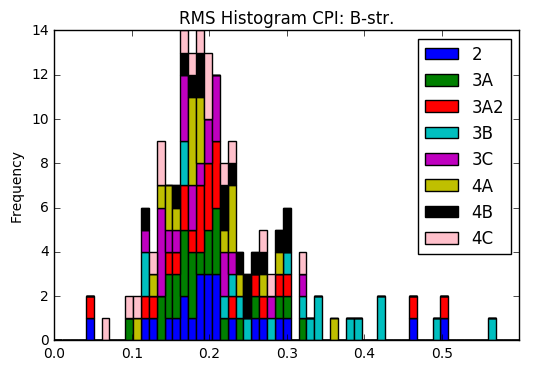

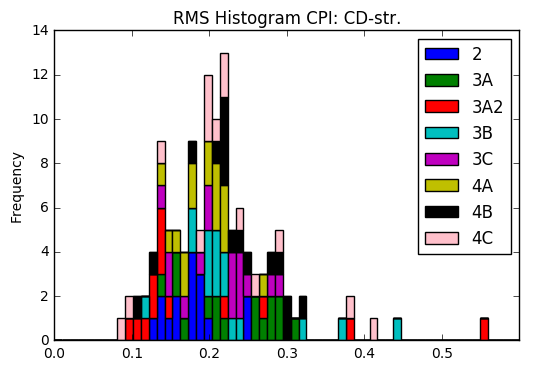

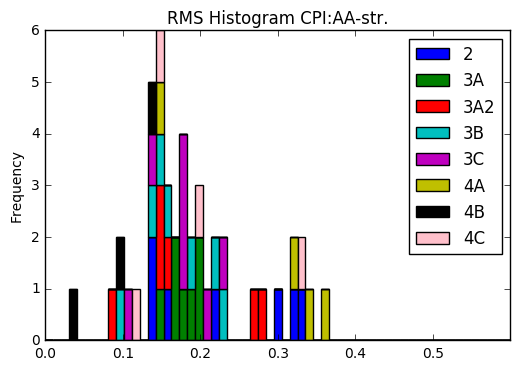

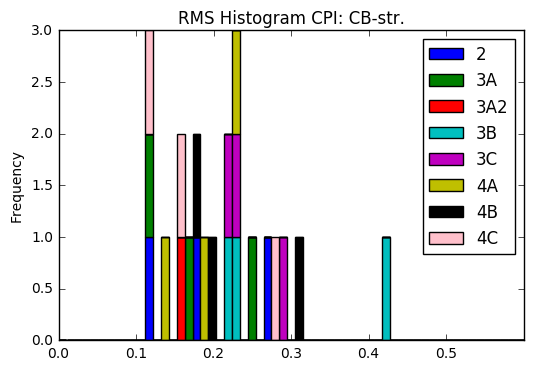

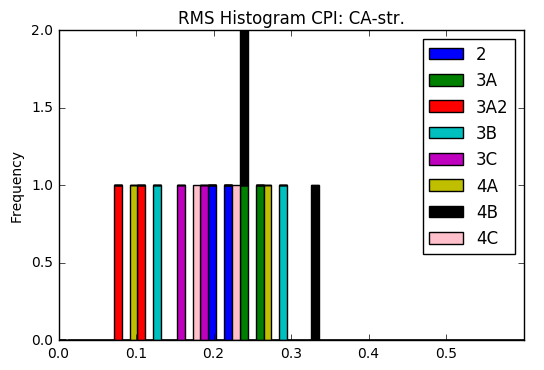

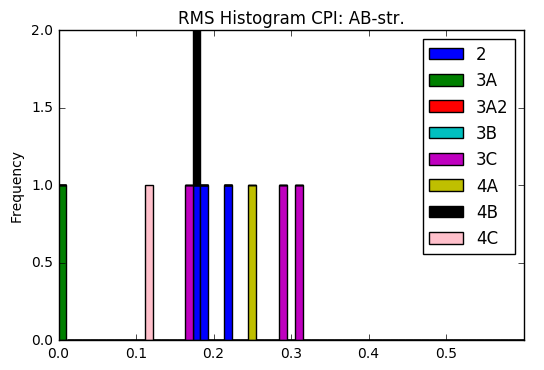

In [10]:
nn=['RMS Histogram CPI: B-str.', 'RMS Histogram CPI: CD-str.', 'RMS Histogram CPI:AA-str.', 
    'RMS Histogram CPI: CB-str.', 'RMS Histogram CPI: CA-str.', 'RMS Histogram CPI: AB-str.']
for i , cc , name in zip([1, 2, 3, 4, 5, 6], [cpiB, cpiCD, cpiAA, cpiCB, cpiCA, cpiAB], nn):
    aa=histCPI2_4(cc)
    binBoundaries = np.linspace(0,0.6,60)
    aa.plot.hist(stacked=True, bins=binBoundaries, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink'])
    plt.xlim(0,0.6)
    plt.title(name)
    #plt.savefig('RMS-CPI'+ str(i) +'.png', bbox_inches='tight')      

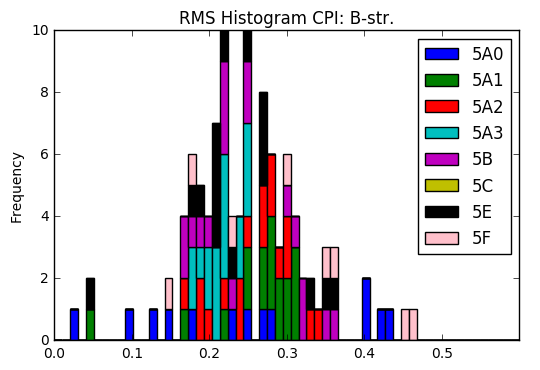

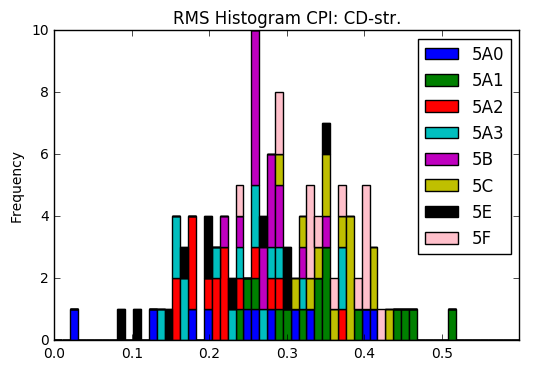

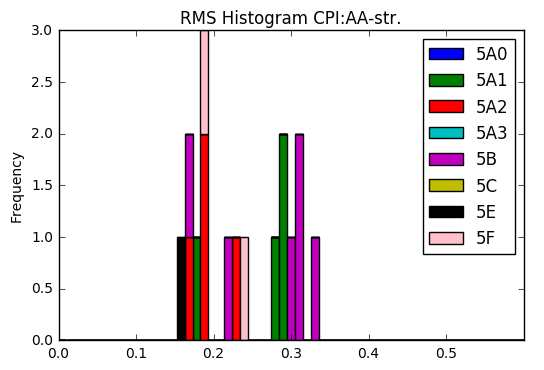

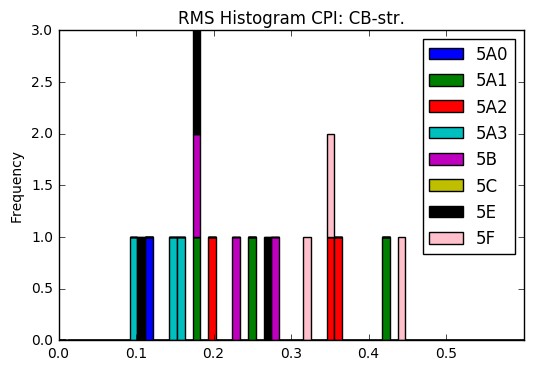

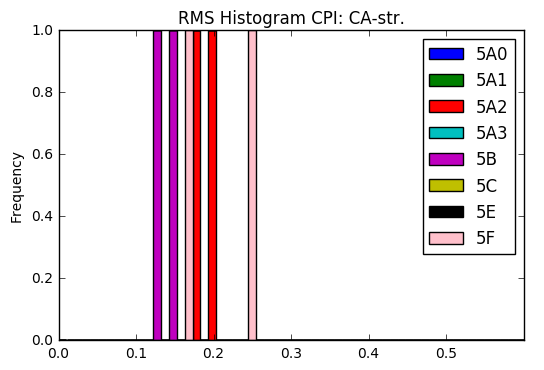

In [11]:
nn=['RMS Histogram CPI: B-str.', 'RMS Histogram CPI: CD-str.', 'RMS Histogram CPI:AA-str.', 
    'RMS Histogram CPI: CB-str.', 'RMS Histogram CPI: CA-str.']
for i , cc , name in zip([1, 2, 3, 4, 5], [cpiB, cpiCD, cpiAA, cpiCB, cpiCA], nn):
    aa=histCPI5(cc)
    binBoundaries = np.linspace(0,0.6,60)
    aa.plot.hist(stacked=True, bins=binBoundaries, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink'])
    plt.xlim(0,0.6)
    plt.title(name)
    #plt.savefig('RMS-CPI5_'+ str(i) +'.png', bbox_inches='tight')     

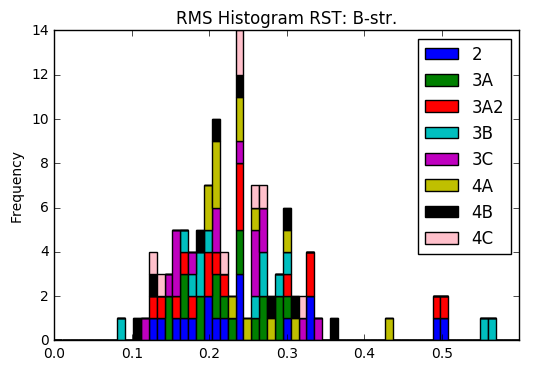

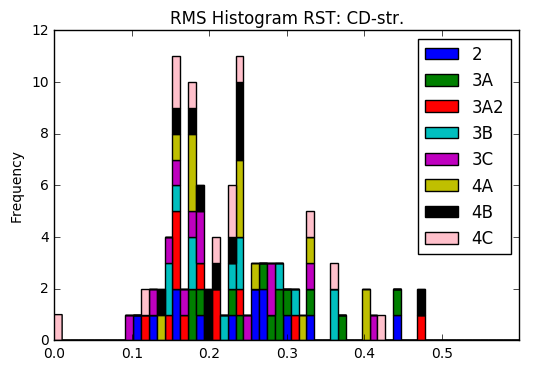

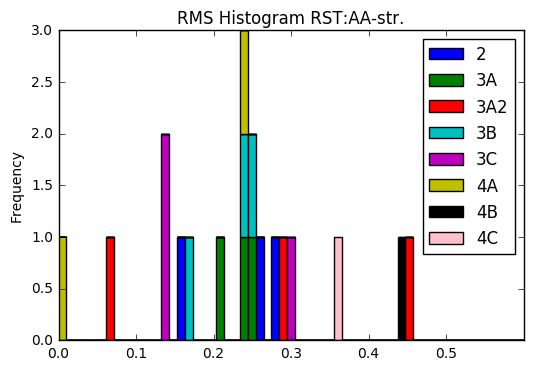

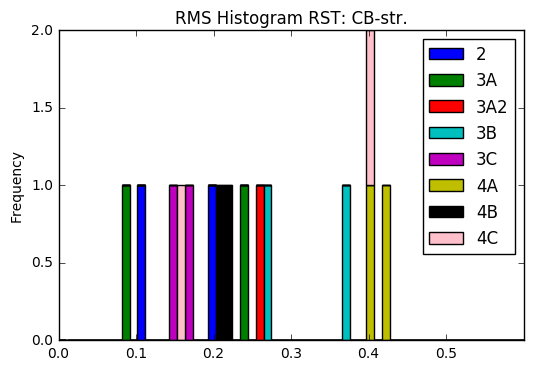

In [12]:
nn=['RMS Histogram RST: B-str.', 'RMS Histogram RST: CD-str.', 'RMS Histogram RST:AA-str.', 
    'RMS Histogram RST: CB-str.']
for i , cc , name in zip([1, 2, 3, 4], [rstB, rstCD, rstAA, rstCB], nn):
    aa=histRST2_4(cc)
    binBoundaries = np.linspace(0,0.6,60)
    aa.plot.hist(stacked=True, bins=binBoundaries, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink'])
    plt.xlim(0,0.6)
    plt.title(name)
    #plt.savefig('RMS-RST'+ str(i) +'.png', bbox_inches='tight')     

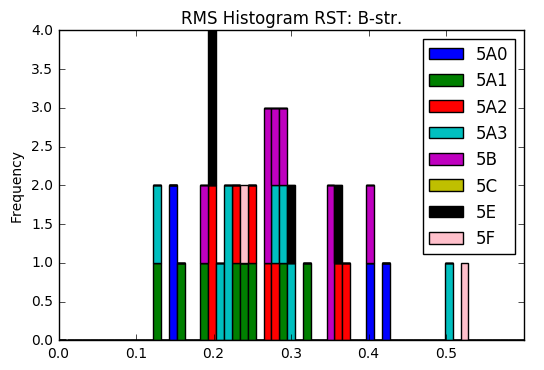

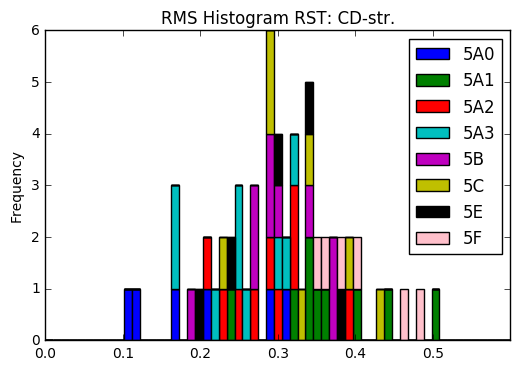

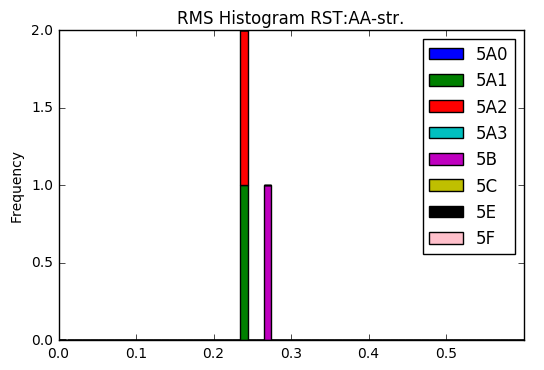

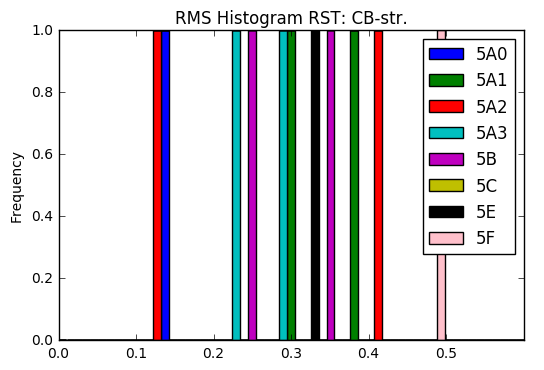

In [13]:
nn=['RMS Histogram RST: B-str.', 'RMS Histogram RST: CD-str.', 'RMS Histogram RST:AA-str.', 
    'RMS Histogram RST: CB-str.']
for i , cc , name in zip([1, 2, 3, 4], [rstB, rstCD, rstAA, rstCB], nn):
    aa=histRST5(cc)
    #aa.plot.hist(stacked=True, bins=45, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink'])
    binBoundaries = np.linspace(0,0.6,60)
    aa.plot.hist(stacked=True, bins=binBoundaries, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink'])
    plt.xlim(0,0.6)
    plt.title(name)
    #plt.savefig('RMS-RST5_'+ str(i) +'.png', bbox_inches='tight')    